##### VanderPlas, Jake. 2016. Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/

## Hierarchical Indexing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# the bad way of multi indexed series

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

In [ ]:
pop[('California', 2010):('Texas', 2000)]

In [ ]:
for i in pop.index:
    if i[1] == 2000:
        print(pop[i])

In [ ]:
pop[[i for i in pop.index if i[1] == 2000]]

In [ ]:
pop

In [ ]:
pop[('California', 2000)]

In [ ]:
pop[:, 2000]

The Better Way: Pandas MultiIndex

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

In [ ]:
pop = pop.reindex(index)
pop

In [ ]:
pop[:, 2000]

MultiIndex as extra dimension

In [ ]:
pop_df = pop.unstack()
pop_df
#from long to wide in Stata

In [ ]:
pop_df.stack()


In [ ]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

In [ ]:
f_u18 = round((pop_df['under18'] / pop_df['total'])*100,2)
f_u18.unstack()

Explicit MultiIndex constructors

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

In [ ]:
pd.MultiIndex.from_product([['a', 'b','c','d'], range(1990,1994)])

In [ ]:
pop.index.names = ['state', 'year']
pop

MultiIndex for column

In a DataFrame, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well. Consider the following, which is a mock-up of some (somewhat realistic) medical data

...the average heart rate and temperature... 
...years and visits... 
...three guys: Bod, Guido ans Sue...

four dimensional data

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)

In [ ]:
data

In [ ]:
data[:, ::2] *= 10
data += 37

data

In [ ]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

In [ ]:
health_data['Guido']

In [ ]:
health_data['Guido', 'HR']

In [ ]:
health_data.iloc[:2]

In [ ]:
health_data.iloc[:2,:2]

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

Stacking and unstacking indices

In [ ]:
pop

In [ ]:
pop.unstack()

In [ ]:
pop.unstack(level=0)

In [ ]:
pop.unstack().stack()

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

In [ ]:
pop_flat.set_index(['state', 'year'])

Data Aggregations on Multi-Indices

In [ ]:
health_data

In [ ]:
data_mean = health_data.mean(level='year')
data_mean

In [ ]:
data_mean = health_data.groupby(level='year').mean()
data_mean

In [ ]:
pop

In [ ]:
pop.mean(level='state')

In [ ]:
pop.mean(level='year')

In [ ]:
pop

In [ ]:
pop.groupby(level='state').mean()

In [ ]:
pop.groupby(level='year').mean()

## Combining Datasets: Concat

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1) # Note that default option is neither axis=0 nor axis=1

In [ ]:
np.shape(x)

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

In [ ]:
#different observations, same features
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display(df1, df2, pd.concat([df1, df2]))

In [ ]:
#different features, same observations (a more common case while working with real life data)
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display(df3, df4, pd.concat([df3, df4], axis=1))

## Merge and Join

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

In [ ]:
#One-to-one
df3 = pd.merge(df1, df2)
df3

#The pd.merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. 

In [ ]:
#Many-to-one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3, df4, pd.merge(df3, df4))

In [ ]:
#Many-to-many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df1, df5, pd.merge(df1, df5))

Specification of the Merge Key

In [ ]:
display(df1, df2, pd.merge(df1, df2, on='employee'))

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1, df3, pd.merge(df1, df3, left_on="employee", right_on="name"))

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display(df1a, df2a)

In [ ]:
display(df1a, df2a,
        pd.merge(df1a, df2a, left_index=False, right_index=False))

In [ ]:
display(df1a, df2a)

In [ ]:
pd.merge(df1a, df2a, left_index=True, right_index=True).reset_index()

Specifying Set Arithmetic for Joins

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display(df6, df7, pd.merge(df6, df7))

In [ ]:
pd.merge(df6, df7, how='inner')

In [ ]:
display(df6, df7, pd.merge(df6, df7, how='outer'))

In [ ]:
display(df6, df7, pd.merge(df6, df7, how='right'))

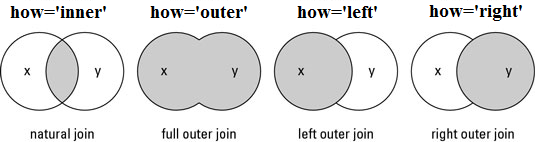

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display(df8, df9, pd.merge(df8, df9, on="name"))

In [ ]:
display(df8, df9, pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

## Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# pip install seaborn

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
planets.head(10)

In [ ]:
rng = np.random.RandomState(42)

In [ ]:
type(rng)

In [ ]:
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

In [ ]:
df.mean(axis='columns') #instead of 'columns', just write 1

In [ ]:
planets.dropna().describe()

GroupBy: Split, Apply, Combine

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

In [ ]:
df.groupby('key')

In [ ]:
df.groupby('key').sum()

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [ ]:
planets['orbital_period'].median()

In [ ]:
planets.groupby('method')['orbital_period'].median()

In [ ]:
planets.groupby('method')['orbital_period'].describe()

Aggregate, filter, transform, apply

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

In [ ]:
#aggregation returns some reduced version of data
df.groupby('key').aggregate([min, np.median, max])

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

In [ ]:
def asd(x):
    return x['data2'].std() > 4

display(df, df.groupby('key').std(), df.groupby('key').filter(asd))

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [ ]:
##transformation returns transformed version of data

display(df, df.groupby('key').mean(), df.groupby('key').transform(lambda x: x - x.mean()))

A lambda function in python is a small anonymous function that can take any number of arguments and execute an expression.

In [ ]:
df['data2'].sum()

In [ ]:
df

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display(df, df.groupby('key').apply(norm_by_data2))

In [ ]:
L = [0, 1, 0, 1, 2, 0]

display(df, df.groupby(L).sum())

In [ ]:
display(df, df.groupby(df['key']).sum())

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display(df2, df2.groupby(mapping).sum())

In [ ]:
display(df2, df2.groupby(str.lower).mean())

In [ ]:
df2.groupby([str.lower, mapping]).mean()

#### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [ ]:
planets

In [ ]:
decade = 10 * (planets['year'] // 10) # rounded down to the nearest whole number

In [ ]:
decade = decade.astype(str) + 's'
decade

In [ ]:
planets['decade']=decade
planets

In [ ]:
planets.groupby(['method','decade'])['number'].sum()

In [ ]:
planets.groupby(['method', 'decade'])['number'].sum().unstack(level=1)

In [ ]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)